In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from handler import build_dataset
from models import cnn_model, lstm_model, lstm_cnn_model, run_model
from tuning import create_study, get_optimized_parameters

2023-12-05 13:54:36.165624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/miniconda3/envs/fintech/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 0. Load Data Set

In [2]:
N_STEPS = 72
N_HORIZON = 24
N_FEATURES = 2
train_df, val_df, test_df = build_dataset(path='./src/rv_sentiment.csv', n_steps=N_STEPS, n_horizon=N_HORIZON)

Prediction lookback (n_steps): 72
Prediction horizon (n_horizon): 24
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))


# 1. Hyperparameter Tuning

In [3]:
cnn_study = create_study(model_fun=cnn_model,
                         train=train_df,
                         val=val_df,
                         n_steps=N_STEPS,
                         n_horizon=N_HORIZON,
                         n_features=N_FEATURES)
lstm_study = create_study(model_fun=lstm_model,
                          train=train_df,
                          val=val_df,
                          n_steps=N_STEPS,
                          n_horizon=N_HORIZON,
                          n_features=N_FEATURES)
stacked_study = create_study(model_fun=lstm_cnn_model,
                             train=train_df,
                             val=val_df,
                             n_steps=N_STEPS,
                             n_horizon=N_HORIZON,
                             n_features=N_FEATURES)

/opt/miniconda3/envs/fintech/lib/python3.10/site-packages/optuna/samplers/_tpe/sampler.py:295: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2023-12-05 13:54:39,399] A new study created in RDB with name: no-name-5c8b25c3-8cc1-4586-8bc7-f50e207e5cef


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0325 - mae: 0.2079 - val_loss: 0.0189 - val_mae: 0.1108
Epoch 2/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0144 - mae: 0.1353 - val_loss: 0.0189 - val_mae: 0.1123
Epoch 3/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0133 - mae: 0.1257 - val_loss: 0.0189 - val_mae: 0.1036
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0092 - mae: 0.1062 - val_loss: 0.0191 - val_mae: 0.0952
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0074 - mae: 0.0946 - val_loss: 0.0194 - val_mae: 0.0897
Epoch 6/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0066 - mae: 0.0870 - val_loss: 0.0196 - val_mae: 0.0862
Epoch 7/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0061 - mae: 0.0807 - val_loss: 0.0197 - val_mae: 0.0851
Epoch 8/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0059 - mae: 0.0761

[I 2023-12-05 13:54:50,833] Trial 0 finished with value: 0.08522693067789078 and parameters: {'learning_rate': 0.0012621137363312872, 'weight_decay': 0.0021441046263193}. Best is trial 0 with value: 0.08522693067789078.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0139 - mae: 0.1332 - val_loss: 0.0251 - val_mae: 0.1363
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0148 - mae: 0.1332 - val_loss: 0.0250 - val_mae: 0.1362
Epoch 3/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0159 - mae: 0.1390 - val_loss: 0.0250 - val_mae: 0.1361
Epoch 4/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0172 - mae: 0.1461 - val_loss: 0.0250 - val_mae: 0.1359
Epoch 5/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0150 - mae: 0.1369 - val_loss: 0.0250 - val_mae: 0.1358
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0153 - mae: 0.1396 - val_loss: 0.0250 - val_mae: 0.1357
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0162 - mae: 0.1388 - val_loss: 0.0250 - val_mae: 0.1356
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0151 - mae: 0.1407

[I 2023-12-05 13:55:01,516] Trial 1 finished with value: 0.11880970001220703 and parameters: {'learning_rate': 1.6200303767871414e-06, 'weight_decay': 0.005790892783214982}. Best is trial 0 with value: 0.08522693067789078.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0312 - mae: 0.1959 - val_loss: 0.0219 - val_mae: 0.1356
Epoch 2/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0178 - mae: 0.1499 - val_loss: 0.0186 - val_mae: 0.1150
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0124 - mae: 0.1260 - val_loss: 0.0178 - val_mae: 0.1011
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0083 - mae: 0.1016 - val_loss: 0.0187 - val_mae: 0.0949
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0074 - mae: 0.0958 - val_loss: 0.0196 - val_mae: 0.0884
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0058 - mae: 0.0810 - val_loss: 0.0202 - val_mae: 0.0873
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0065 - mae: 0.0839 - val_loss: 0.0204 - val_mae: 0.0862
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0053 - mae: 0.0699

[I 2023-12-05 13:55:13,029] Trial 2 finished with value: 0.09544417262077332 and parameters: {'learning_rate': 0.0015388499135113984, 'weight_decay': 9.178330927998499e-05}. Best is trial 0 with value: 0.08522693067789078.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0242 - mae: 0.1796 - val_loss: 0.0294 - val_mae: 0.1617
Epoch 2/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0247 - mae: 0.1757 - val_loss: 0.0293 - val_mae: 0.1615
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0240 - mae: 0.1727 - val_loss: 0.0293 - val_mae: 0.1613
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0252 - mae: 0.1740 - val_loss: 0.0292 - val_mae: 0.1611
Epoch 5/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0245 - mae: 0.1802 - val_loss: 0.0292 - val_mae: 0.1609
Epoch 6/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0277 - mae: 0.1828 - val_loss: 0.0291 - val_mae: 0.1606
Epoch 7/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0269 - mae: 0.1761 - val_loss: 0.0291 - val_mae: 0.1604
Epoch 8/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0248 - mae: 0.1768

[I 2023-12-05 13:55:23,357] Trial 3 finished with value: 0.13234838843345642 and parameters: {'learning_rate': 2.3172155882515957e-06, 'weight_decay': 0.005505773370770624}. Best is trial 0 with value: 0.08522693067789078.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0316 - mae: 0.2076 - val_loss: 0.0240 - val_mae: 0.1225
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0160 - mae: 0.1385 - val_loss: 0.0193 - val_mae: 0.0913
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0146 - mae: 0.1314 - val_loss: 0.0177 - val_mae: 0.0919
Epoch 4/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0114 - mae: 0.1149 - val_loss: 0.0170 - val_mae: 0.0963
Epoch 5/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0090 - mae: 0.1065 - val_loss: 0.0172 - val_mae: 0.0959
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0077 - mae: 0.0982 - val_loss: 0.0176 - val_mae: 0.0931
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0064 - mae: 0.0874 - val_loss: 0.0179 - val_mae: 0.0891
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0052 - mae: 0.0788

[I 2023-12-05 13:55:33,560] Trial 4 finished with value: 0.09442269057035446 and parameters: {'learning_rate': 0.0007615217078388018, 'weight_decay': 1.9994901014411217e-07}. Best is trial 0 with value: 0.08522693067789078.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0316 - mae: 0.2011 - val_loss: 0.0225 - val_mae: 0.1195
Epoch 2/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0126 - mae: 0.1283 - val_loss: 0.0203 - val_mae: 0.1069
Epoch 3/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0097 - mae: 0.1085 - val_loss: 0.0190 - val_mae: 0.0966
Epoch 4/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0070 - mae: 0.0905 - val_loss: 0.0187 - val_mae: 0.0871
Epoch 5/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0064 - mae: 0.0834 - val_loss: 0.0190 - val_mae: 0.0863
Epoch 6/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0058 - mae: 0.0762 - val_loss: 0.0192 - val_mae: 0.0846
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0050 - mae: 0.0721 - val_loss: 0.0193 - val_mae: 0.0828
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0050 - mae: 0.0688

[I 2023-12-05 13:55:43,823] Trial 5 finished with value: 0.09158733487129211 and parameters: {'learning_rate': 0.0014619601850895823, 'weight_decay': 1.4691914863729165e-05}. Best is trial 0 with value: 0.08522693067789078.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0368 - mae: 0.2174 - val_loss: 0.0267 - val_mae: 0.1296
Epoch 2/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0216 - mae: 0.1635 - val_loss: 0.0186 - val_mae: 0.0939
Epoch 3/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0144 - mae: 0.1335 - val_loss: 0.0161 - val_mae: 0.0924
Epoch 4/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0145 - mae: 0.1322 - val_loss: 0.0164 - val_mae: 0.1015
Epoch 5/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0134 - mae: 0.1322 - val_loss: 0.0169 - val_mae: 0.1057
Epoch 6/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0135 - mae: 0.1298 - val_loss: 0.0172 - val_mae: 0.1048
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0117 - mae: 0.1224 - val_loss: 0.0172 - val_mae: 0.0991
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0079 - mae: 0.0971

[I 2023-12-05 13:55:53,967] Trial 6 finished with value: 0.0917372852563858 and parameters: {'learning_rate': 0.0006198792357481174, 'weight_decay': 0.0001568973346722977}. Best is trial 0 with value: 0.08522693067789078.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0279 - mae: 0.1907 - val_loss: 0.0319 - val_mae: 0.1528
Epoch 2/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0240 - mae: 0.1721 - val_loss: 0.0313 - val_mae: 0.1497
Epoch 3/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0227 - mae: 0.1719 - val_loss: 0.0306 - val_mae: 0.1465
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0216 - mae: 0.1647 - val_loss: 0.0300 - val_mae: 0.1434
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0270 - mae: 0.1832 - val_loss: 0.0295 - val_mae: 0.1403
Epoch 6/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0250 - mae: 0.1703 - val_loss: 0.0289 - val_mae: 0.1372
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0206 - mae: 0.1616 - val_loss: 0.0284 - val_mae: 0.1343
Epoch 8/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0204 - mae: 0.1565

[I 2023-12-05 13:56:04,219] Trial 7 finished with value: 0.07824554294347763 and parameters: {'learning_rate': 4.010875006693945e-05, 'weight_decay': 5.6544490579689775e-09}. Best is trial 7 with value: 0.07824554294347763.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0220 - mae: 0.1672 - val_loss: 0.0264 - val_mae: 0.1418
Epoch 2/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0195 - mae: 0.1557 - val_loss: 0.0263 - val_mae: 0.1417
Epoch 3/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0187 - mae: 0.1482 - val_loss: 0.0263 - val_mae: 0.1415
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0175 - mae: 0.1521 - val_loss: 0.0263 - val_mae: 0.1414
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0204 - mae: 0.1641 - val_loss: 0.0263 - val_mae: 0.1413
Epoch 6/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0203 - mae: 0.1625 - val_loss: 0.0263 - val_mae: 0.1411
Epoch 7/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0198 - mae: 0.1557 - val_loss: 0.0262 - val_mae: 0.1410
Epoch 8/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0176 - mae: 0.1490

[I 2023-12-05 13:56:14,408] Trial 8 finished with value: 0.12178070843219757 and parameters: {'learning_rate': 1.9288162712327108e-06, 'weight_decay': 7.98241828617631e-05}. Best is trial 7 with value: 0.07824554294347763.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0195 - mae: 0.1561 - val_loss: 0.0288 - val_mae: 0.1503
Epoch 2/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0194 - mae: 0.1599 - val_loss: 0.0288 - val_mae: 0.1502
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0213 - mae: 0.1643 - val_loss: 0.0288 - val_mae: 0.1501
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0212 - mae: 0.1650 - val_loss: 0.0287 - val_mae: 0.1500
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0234 - mae: 0.1771 - val_loss: 0.0287 - val_mae: 0.1498
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0198 - mae: 0.1659 - val_loss: 0.0287 - val_mae: 0.1497
Epoch 7/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0203 - mae: 0.1567 - val_loss: 0.0287 - val_mae: 0.1496
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0178 - mae: 0.1487

[I 2023-12-05 13:56:24,629] Trial 9 finished with value: 0.13230223953723907 and parameters: {'learning_rate': 1.6182561470878897e-06, 'weight_decay': 0.0033652273365982303}. Best is trial 7 with value: 0.07824554294347763.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0179 - mae: 0.1504 - val_loss: 0.0232 - val_mae: 0.1243
Epoch 2/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0154 - mae: 0.1360 - val_loss: 0.0230 - val_mae: 0.1230
Epoch 3/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0145 - mae: 0.1327 - val_loss: 0.0228 - val_mae: 0.1216
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0164 - mae: 0.1435 - val_loss: 0.0226 - val_mae: 0.1202
Epoch 5/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0179 - mae: 0.1492 - val_loss: 0.0224 - val_mae: 0.1188
Epoch 6/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0165 - mae: 0.1443 - val_loss: 0.0222 - val_mae: 0.1174
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0141 - mae: 0.1334 - val_loss: 0.0220 - val_mae: 0.1160
Epoch 8/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0156 - mae: 0.1366

[I 2023-12-05 13:56:34,934] Trial 10 finished with value: 0.07796110212802887 and parameters: {'learning_rate': 2.44251229921874e-05, 'weight_decay': 1.6081786471825142e-09}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0234 - mae: 0.1685 - val_loss: 0.0296 - val_mae: 0.1551
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0211 - mae: 0.1647 - val_loss: 0.0294 - val_mae: 0.1541
Epoch 3/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0224 - mae: 0.1686 - val_loss: 0.0292 - val_mae: 0.1530
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0223 - mae: 0.1665 - val_loss: 0.0290 - val_mae: 0.1519
Epoch 5/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0199 - mae: 0.1638 - val_loss: 0.0287 - val_mae: 0.1508
Epoch 6/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0213 - mae: 0.1619 - val_loss: 0.0285 - val_mae: 0.1496
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0168 - mae: 0.1418 - val_loss: 0.0283 - val_mae: 0.1485
Epoch 8/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0210 - mae: 0.1608

[I 2023-12-05 13:56:45,155] Trial 11 finished with value: 0.08319808542728424 and parameters: {'learning_rate': 1.4443159922897843e-05, 'weight_decay': 2.4575634127371804e-09}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 0.0228 - mae: 0.1767 - val_loss: 0.0323 - val_mae: 0.1639
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0232 - mae: 0.1738 - val_loss: 0.0312 - val_mae: 0.1587
Epoch 3/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0204 - mae: 0.1598 - val_loss: 0.0302 - val_mae: 0.1536
Epoch 4/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0201 - mae: 0.1623 - val_loss: 0.0292 - val_mae: 0.1484
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0207 - mae: 0.1571 - val_loss: 0.0282 - val_mae: 0.1433
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0181 - mae: 0.1534 - val_loss: 0.0273 - val_mae: 0.1382
Epoch 7/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0187 - mae: 0.1565 - val_loss: 0.0264 - val_mae: 0.1332
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0183 - mae: 0.1536

[I 2023-12-05 13:56:55,879] Trial 12 finished with value: 0.08053125441074371 and parameters: {'learning_rate': 6.025500785009225e-05, 'weight_decay': 9.556986823563704e-09}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0425 - mae: 0.2274 - val_loss: 0.0426 - val_mae: 0.2046
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0444 - mae: 0.2331 - val_loss: 0.0425 - val_mae: 0.2044
Epoch 3/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0397 - mae: 0.2234 - val_loss: 0.0425 - val_mae: 0.2042
Epoch 4/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0389 - mae: 0.2214 - val_loss: 0.0424 - val_mae: 0.2040
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0396 - mae: 0.2204 - val_loss: 0.0423 - val_mae: 0.2038
Epoch 6/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0392 - mae: 0.2241 - val_loss: 0.0423 - val_mae: 0.2035
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0364 - mae: 0.2089 - val_loss: 0.0422 - val_mae: 0.2033
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0426 - mae: 0.2305

[I 2023-12-05 13:57:06,172] Trial 13 finished with value: 0.1738041639328003 and parameters: {'learning_rate': 1.891350397944202e-06, 'weight_decay': 7.52298211964175e-09}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0231 - mae: 0.1659 - val_loss: 0.0253 - val_mae: 0.1260
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0193 - mae: 0.1521 - val_loss: 0.0227 - val_mae: 0.1082
Epoch 3/150
1/1 [==============================] - 0s 44ms/step - loss: 0.0134 - mae: 0.1267 - val_loss: 0.0211 - val_mae: 0.0970
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0137 - mae: 0.1305 - val_loss: 0.0200 - val_mae: 0.0959
Epoch 5/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0119 - mae: 0.1238 - val_loss: 0.0192 - val_mae: 0.0958
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0119 - mae: 0.1232 - val_loss: 0.0186 - val_mae: 0.0954
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0105 - mae: 0.1105 - val_loss: 0.0183 - val_mae: 0.0966
Epoch 8/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0092 - mae: 0.1094

[I 2023-12-05 13:57:16,386] Trial 14 finished with value: 0.08389332890510559 and parameters: {'learning_rate': 0.0002553989648807396, 'weight_decay': 2.526792420145048e-09}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0222 - mae: 0.1680 - val_loss: 0.0316 - val_mae: 0.1658
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0255 - mae: 0.1816 - val_loss: 0.0312 - val_mae: 0.1638
Epoch 3/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0209 - mae: 0.1590 - val_loss: 0.0307 - val_mae: 0.1617
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0215 - mae: 0.1650 - val_loss: 0.0303 - val_mae: 0.1596
Epoch 5/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0228 - mae: 0.1683 - val_loss: 0.0299 - val_mae: 0.1575
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0241 - mae: 0.1760 - val_loss: 0.0294 - val_mae: 0.1554
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0220 - mae: 0.1625 - val_loss: 0.0290 - val_mae: 0.1533
Epoch 8/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0186 - mae: 0.1526

[I 2023-12-05 13:57:26,553] Trial 15 finished with value: 0.07914000749588013 and parameters: {'learning_rate': 3.0426207670632304e-05, 'weight_decay': 9.639861519297356e-08}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0575 - mae: 0.2688 - val_loss: 0.0520 - val_mae: 0.2237
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0555 - mae: 0.2589 - val_loss: 0.0517 - val_mae: 0.2229
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0548 - mae: 0.2549 - val_loss: 0.0514 - val_mae: 0.2221
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0554 - mae: 0.2496 - val_loss: 0.0510 - val_mae: 0.2212
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0543 - mae: 0.2541 - val_loss: 0.0507 - val_mae: 0.2203
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0569 - mae: 0.2607 - val_loss: 0.0504 - val_mae: 0.2194
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0533 - mae: 0.2558 - val_loss: 0.0501 - val_mae: 0.2185
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0435 - mae: 0.2289

[I 2023-12-05 13:57:36,890] Trial 16 finished with value: 0.1279830038547516 and parameters: {'learning_rate': 6.477316583022758e-06, 'weight_decay': 1.322813744917166e-09}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0522 - mae: 0.2558 - val_loss: 0.0402 - val_mae: 0.2001
Epoch 2/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0496 - mae: 0.2546 - val_loss: 0.0400 - val_mae: 0.1994
Epoch 3/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0452 - mae: 0.2356 - val_loss: 0.0398 - val_mae: 0.1987
Epoch 4/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0479 - mae: 0.2395 - val_loss: 0.0396 - val_mae: 0.1979
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0447 - mae: 0.2374 - val_loss: 0.0394 - val_mae: 0.1971
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0379 - mae: 0.2212 - val_loss: 0.0392 - val_mae: 0.1964
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0374 - mae: 0.2110 - val_loss: 0.0390 - val_mae: 0.1956
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0400 - mae: 0.2239

[I 2023-12-05 13:57:47,122] Trial 17 finished with value: 0.11979298293590546 and parameters: {'learning_rate': 5.780841992837617e-06, 'weight_decay': 7.923238676419618e-07}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0263 - mae: 0.1792 - val_loss: 0.1291 - val_mae: 0.4246
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 0.1329 - mae: 0.4258 - val_loss: 0.0230 - val_mae: 0.1088
Epoch 3/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0080 - mae: 0.0926 - val_loss: 0.0184 - val_mae: 0.1007
Epoch 4/150
1/1 [==============================] - 0s 45ms/step - loss: 0.0076 - mae: 0.0934 - val_loss: 0.0176 - val_mae: 0.0837
Epoch 5/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0044 - mae: 0.0692 - val_loss: 0.0177 - val_mae: 0.0938
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0054 - mae: 0.0781 - val_loss: 0.0239 - val_mae: 0.1578
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0129 - mae: 0.1306 - val_loss: 0.0221 - val_mae: 0.1021
Epoch 8/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0067 - mae: 0.0848

[I 2023-12-05 13:57:57,939] Trial 18 finished with value: 0.08474120497703552 and parameters: {'learning_rate': 0.014670261712091306, 'weight_decay': 1.4968715084083847e-09}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0195 - mae: 0.1492 - val_loss: 0.0317 - val_mae: 0.1559
Epoch 2/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0218 - mae: 0.1583 - val_loss: 0.0317 - val_mae: 0.1558
Epoch 3/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0207 - mae: 0.1587 - val_loss: 0.0317 - val_mae: 0.1558
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0246 - mae: 0.1687 - val_loss: 0.0317 - val_mae: 0.1558
Epoch 5/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0240 - mae: 0.1680 - val_loss: 0.0317 - val_mae: 0.1557
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0239 - mae: 0.1628 - val_loss: 0.0317 - val_mae: 0.1557
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0228 - mae: 0.1611 - val_loss: 0.0317 - val_mae: 0.1557
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0240 - mae: 0.1712

[I 2023-12-05 13:58:07,996] Trial 19 finished with value: 0.15055134892463684 and parameters: {'learning_rate': 5.450697670694043e-07, 'weight_decay': 6.473007270396716e-08}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0182 - mae: 0.1500 - val_loss: 0.0197 - val_mae: 0.0882
Epoch 2/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0143 - mae: 0.1327 - val_loss: 0.0181 - val_mae: 0.0900
Epoch 3/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0105 - mae: 0.1120 - val_loss: 0.0178 - val_mae: 0.0955
Epoch 4/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0078 - mae: 0.0977 - val_loss: 0.0177 - val_mae: 0.0956
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0079 - mae: 0.0986 - val_loss: 0.0179 - val_mae: 0.0924
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0060 - mae: 0.0893 - val_loss: 0.0182 - val_mae: 0.0884
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0057 - mae: 0.0838 - val_loss: 0.0185 - val_mae: 0.0846
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0055 - mae: 0.0800

[I 2023-12-05 13:58:18,122] Trial 20 finished with value: 0.08944808691740036 and parameters: {'learning_rate': 0.0007636934765620424, 'weight_decay': 1.4922868649815158e-09}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0353 - mae: 0.2072 - val_loss: 0.0429 - val_mae: 0.1848
Epoch 2/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0353 - mae: 0.2108 - val_loss: 0.0423 - val_mae: 0.1827
Epoch 3/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0299 - mae: 0.1988 - val_loss: 0.0417 - val_mae: 0.1806
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0324 - mae: 0.2041 - val_loss: 0.0411 - val_mae: 0.1785
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0281 - mae: 0.1897 - val_loss: 0.0404 - val_mae: 0.1763
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0306 - mae: 0.1905 - val_loss: 0.0398 - val_mae: 0.1742
Epoch 7/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0280 - mae: 0.1828 - val_loss: 0.0392 - val_mae: 0.1721
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0323 - mae: 0.1970

[I 2023-12-05 13:58:28,519] Trial 21 finished with value: 0.08151700347661972 and parameters: {'learning_rate': 2.4941221483762378e-05, 'weight_decay': 5.004433034225862e-07}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0310 - mae: 0.1992 - val_loss: 0.0365 - val_mae: 0.1890
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0307 - mae: 0.2037 - val_loss: 0.0351 - val_mae: 0.1838
Epoch 3/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0269 - mae: 0.1829 - val_loss: 0.0338 - val_mae: 0.1783
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0314 - mae: 0.1981 - val_loss: 0.0325 - val_mae: 0.1727
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0273 - mae: 0.1912 - val_loss: 0.0313 - val_mae: 0.1670
Epoch 6/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0265 - mae: 0.1846 - val_loss: 0.0301 - val_mae: 0.1613
Epoch 7/150
1/1 [==============================] - 0s 75ms/step - loss: 0.0231 - mae: 0.1774 - val_loss: 0.0290 - val_mae: 0.1556
Epoch 8/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0220 - mae: 0.1650

[I 2023-12-05 13:58:41,229] Trial 22 finished with value: 0.08213689178228378 and parameters: {'learning_rate': 4.851867543535114e-05, 'weight_decay': 1.3759276663228347e-07}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0196 - mae: 0.1602 - val_loss: 0.0268 - val_mae: 0.1341
Epoch 2/150
1/1 [==============================] - 0s 79ms/step - loss: 0.0198 - mae: 0.1554 - val_loss: 0.0265 - val_mae: 0.1321
Epoch 3/150
1/1 [==============================] - 0s 116ms/step - loss: 0.0172 - mae: 0.1475 - val_loss: 0.0261 - val_mae: 0.1299
Epoch 4/150
1/1 [==============================] - 0s 70ms/step - loss: 0.0168 - mae: 0.1482 - val_loss: 0.0257 - val_mae: 0.1277
Epoch 5/150
1/1 [==============================] - 0s 74ms/step - loss: 0.0173 - mae: 0.1440 - val_loss: 0.0253 - val_mae: 0.1255
Epoch 6/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0162 - mae: 0.1415 - val_loss: 0.0249 - val_mae: 0.1232
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0162 - mae: 0.1436 - val_loss: 0.0245 - val_mae: 0.1210
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0154 - mae: 0.142

[I 2023-12-05 13:58:55,330] Trial 23 finished with value: 0.08164747059345245 and parameters: {'learning_rate': 3.3372188144642476e-05, 'weight_decay': 4.967444016485161e-08}. Best is trial 10 with value: 0.07796110212802887.


Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 0.0248 - mae: 0.1757 - val_loss: 0.0247 - val_mae: 0.1359
Epoch 2/150
1/1 [==============================] - 0s 100ms/step - loss: 0.0187 - mae: 0.1507 - val_loss: 0.0235 - val_mae: 0.1282
Epoch 3/150
1/1 [==============================] - 0s 138ms/step - loss: 0.0183 - mae: 0.1479 - val_loss: 0.0224 - val_mae: 0.1211
Epoch 4/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0193 - mae: 0.1558 - val_loss: 0.0215 - val_mae: 0.1146
Epoch 5/150
1/1 [==============================] - 0s 81ms/step - loss: 0.0135 - mae: 0.1318 - val_loss: 0.0208 - val_mae: 0.1089
Epoch 6/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0161 - mae: 0.1433 - val_loss: 0.0203 - val_mae: 0.1034
Epoch 7/150
1/1 [==============================] - 0s 54ms/step - loss: 0.0157 - mae: 0.1385 - val_loss: 0.0198 - val_mae: 0.0983
Epoch 8/150
1/1 [==============================] - 0s 80ms/step - loss: 0.0130 - mae: 0.12

[I 2023-12-05 13:59:07,244] Trial 24 finished with value: 0.08203449845314026 and parameters: {'learning_rate': 0.00011117500611526397, 'weight_decay': 1.5572036455719538e-06}. Best is trial 10 with value: 0.07796110212802887.
[I 2023-12-05 13:59:07,282] A new study created in RDB with name: no-name-b84c726f-9fd3-4067-b901-7986a62a7ac0


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0096 - mae: 0.1057 - val_loss: 0.0244 - val_mae: 0.1207
Epoch 2/150
1/1 [==============================] - 0s 171ms/step - loss: 0.0098 - mae: 0.1070 - val_loss: 0.0244 - val_mae: 0.1207
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0094 - mae: 0.1059 - val_loss: 0.0244 - val_mae: 0.1206
Epoch 4/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0091 - mae: 0.1040 - val_loss: 0.0244 - val_mae: 0.1206
Epoch 5/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0091 - mae: 0.1055 - val_loss: 0.0243 - val_mae: 0.1205
Epoch 6/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0097 - mae: 0.1054 - val_loss: 0.0243 - val_mae: 0.1204
Epoch 7/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0093 - mae: 0.1043 - val_loss: 0.0243 - val_mae: 0.1204
Epoch 8/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0097 - mae: 0.10

[I 2023-12-05 13:59:29,063] Trial 0 finished with value: 0.11123034358024597 and parameters: {'learning_rate': 7.550324147331352e-06, 'weight_decay': 3.900244774254743e-09}. Best is trial 0 with value: 0.11123034358024597.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - mae: 0.1097 - val_loss: 0.0209 - val_mae: 0.1360
Epoch 2/150
1/1 [==============================] - 0s 104ms/step - loss: 0.0122 - mae: 0.1291 - val_loss: 0.0207 - val_mae: 0.0898
Epoch 3/150
1/1 [==============================] - 0s 116ms/step - loss: 0.0060 - mae: 0.0721 - val_loss: 0.0194 - val_mae: 0.0851
Epoch 4/150
1/1 [==============================] - 0s 113ms/step - loss: 0.0049 - mae: 0.0669 - val_loss: 0.0179 - val_mae: 0.0890
Epoch 5/150
1/1 [==============================] - 0s 112ms/step - loss: 0.0044 - mae: 0.0693 - val_loss: 0.0172 - val_mae: 0.0826
Epoch 6/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0038 - mae: 0.0615 - val_loss: 0.0168 - val_mae: 0.0806
Epoch 7/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0039 - mae: 0.0619 - val_loss: 0.0165 - val_mae: 0.0824
Epoch 8/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0033 - mae: 0

[I 2023-12-05 13:59:50,659] Trial 1 finished with value: 0.085108183324337 and parameters: {'learning_rate': 0.02487409409109935, 'weight_decay': 1.3012051749220018e-05}. Best is trial 1 with value: 0.085108183324337.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - mae: 0.1101 - val_loss: 0.0251 - val_mae: 0.1243
Epoch 2/150
1/1 [==============================] - 0s 157ms/step - loss: 0.0098 - mae: 0.1099 - val_loss: 0.0251 - val_mae: 0.1242
Epoch 3/150
1/1 [==============================] - 0s 276ms/step - loss: 0.0099 - mae: 0.1113 - val_loss: 0.0251 - val_mae: 0.1241
Epoch 4/150
1/1 [==============================] - 0s 140ms/step - loss: 0.0097 - mae: 0.1088 - val_loss: 0.0251 - val_mae: 0.1241
Epoch 5/150
1/1 [==============================] - 0s 115ms/step - loss: 0.0099 - mae: 0.1103 - val_loss: 0.0250 - val_mae: 0.1240
Epoch 6/150
1/1 [==============================] - 0s 110ms/step - loss: 0.0096 - mae: 0.1085 - val_loss: 0.0250 - val_mae: 0.1240
Epoch 7/150
1/1 [==============================] - 0s 100ms/step - loss: 0.0099 - mae: 0.1110 - val_loss: 0.0250 - val_mae: 0.1239
Epoch 8/150
1/1 [==============================] - 0s 121ms/step - loss: 0.0097 - mae:

[I 2023-12-05 14:00:10,991] Trial 2 finished with value: 0.1156509667634964 and parameters: {'learning_rate': 1.329107332661616e-05, 'weight_decay': 2.623490255020606e-06}. Best is trial 1 with value: 0.085108183324337.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0097 - mae: 0.1096 - val_loss: 0.0252 - val_mae: 0.1218
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0096 - mae: 0.1069 - val_loss: 0.0252 - val_mae: 0.1217
Epoch 3/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0099 - mae: 0.1085 - val_loss: 0.0252 - val_mae: 0.1217
Epoch 4/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0098 - mae: 0.1093 - val_loss: 0.0252 - val_mae: 0.1217
Epoch 5/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0097 - mae: 0.1090 - val_loss: 0.0252 - val_mae: 0.1216
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0097 - mae: 0.1078 - val_loss: 0.0252 - val_mae: 0.1216
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0096 - mae: 0.1075 - val_loss: 0.0252 - val_mae: 0.1216
Epoch 8/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0097 - mae: 0.1087

[I 2023-12-05 14:00:31,012] Trial 3 finished with value: 0.11640835553407669 and parameters: {'learning_rate': 6.472062872221373e-06, 'weight_decay': 1.3649685535101645e-08}. Best is trial 1 with value: 0.085108183324337.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0090 - mae: 0.1046 - val_loss: 0.0246 - val_mae: 0.1201
Epoch 2/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0092 - mae: 0.1059 - val_loss: 0.0246 - val_mae: 0.1199
Epoch 3/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0089 - mae: 0.1044 - val_loss: 0.0246 - val_mae: 0.1198
Epoch 4/150
1/1 [==============================] - 0s 126ms/step - loss: 0.0090 - mae: 0.1039 - val_loss: 0.0246 - val_mae: 0.1196
Epoch 5/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0093 - mae: 0.1057 - val_loss: 0.0245 - val_mae: 0.1195
Epoch 6/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0092 - mae: 0.1049 - val_loss: 0.0245 - val_mae: 0.1193
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0093 - mae: 0.1051 - val_loss: 0.0245 - val_mae: 0.1192
Epoch 8/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0090 - mae: 0.10

[I 2023-12-05 14:00:50,102] Trial 4 finished with value: 0.09185388684272766 and parameters: {'learning_rate': 3.3707840237371834e-05, 'weight_decay': 1.1798896599520189e-09}. Best is trial 1 with value: 0.085108183324337.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0101 - mae: 0.1112 - val_loss: 0.0253 - val_mae: 0.1249
Epoch 2/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0098 - mae: 0.1092 - val_loss: 0.0253 - val_mae: 0.1249
Epoch 3/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0103 - mae: 0.1129 - val_loss: 0.0253 - val_mae: 0.1249
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0100 - mae: 0.1124 - val_loss: 0.0253 - val_mae: 0.1249
Epoch 5/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0103 - mae: 0.1116 - val_loss: 0.0253 - val_mae: 0.1249
Epoch 6/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0102 - mae: 0.1119 - val_loss: 0.0253 - val_mae: 0.1249
Epoch 7/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0099 - mae: 0.1109 - val_loss: 0.0253 - val_mae: 0.1249
Epoch 8/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0099 - mae: 0.1113

[I 2023-12-05 14:01:09,125] Trial 5 finished with value: 0.12446046620607376 and parameters: {'learning_rate': 4.421929608108059e-07, 'weight_decay': 0.0004412766794898174}. Best is trial 1 with value: 0.085108183324337.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0095 - mae: 0.1055 - val_loss: 0.0176 - val_mae: 0.0894
Epoch 2/150
1/1 [==============================] - 0s 102ms/step - loss: 0.0056 - mae: 0.0786 - val_loss: 0.0186 - val_mae: 0.0782
Epoch 3/150
1/1 [==============================] - 0s 108ms/step - loss: 0.0047 - mae: 0.0634 - val_loss: 0.0174 - val_mae: 0.0886
Epoch 4/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0040 - mae: 0.0677 - val_loss: 0.0172 - val_mae: 0.0888
Epoch 5/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0037 - mae: 0.0658 - val_loss: 0.0169 - val_mae: 0.0867
Epoch 6/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0036 - mae: 0.0621 - val_loss: 0.0168 - val_mae: 0.0873
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0037 - mae: 0.0646 - val_loss: 0.0168 - val_mae: 0.0868
Epoch 8/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0035 - mae: 0.06

[I 2023-12-05 14:01:28,368] Trial 6 finished with value: 0.0843486413359642 and parameters: {'learning_rate': 0.012979954082694355, 'weight_decay': 0.003628337880532606}. Best is trial 6 with value: 0.0843486413359642.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0096 - mae: 0.1053 - val_loss: 0.0223 - val_mae: 0.1017
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0073 - mae: 0.0879 - val_loss: 0.0207 - val_mae: 0.0866
Epoch 3/150
1/1 [==============================] - 0s 102ms/step - loss: 0.0060 - mae: 0.0739 - val_loss: 0.0189 - val_mae: 0.0798
Epoch 4/150
1/1 [==============================] - 0s 107ms/step - loss: 0.0046 - mae: 0.0664 - val_loss: 0.0177 - val_mae: 0.0883
Epoch 5/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0046 - mae: 0.0737 - val_loss: 0.0172 - val_mae: 0.0870
Epoch 6/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0048 - mae: 0.0734 - val_loss: 0.0171 - val_mae: 0.0824
Epoch 7/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0035 - mae: 0.0599 - val_loss: 0.0171 - val_mae: 0.0805
Epoch 8/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0035 - mae: 0.05

[I 2023-12-05 14:01:47,155] Trial 7 finished with value: 0.08570673316717148 and parameters: {'learning_rate': 0.005734673381477518, 'weight_decay': 5.0293109817637345e-09}. Best is trial 6 with value: 0.0843486413359642.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0091 - mae: 0.1026 - val_loss: 0.0248 - val_mae: 0.1180
Epoch 2/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0093 - mae: 0.1041 - val_loss: 0.0247 - val_mae: 0.1177
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0092 - mae: 0.1037 - val_loss: 0.0247 - val_mae: 0.1174
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0090 - mae: 0.1030 - val_loss: 0.0246 - val_mae: 0.1170
Epoch 5/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0090 - mae: 0.1008 - val_loss: 0.0246 - val_mae: 0.1167
Epoch 6/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0091 - mae: 0.1033 - val_loss: 0.0246 - val_mae: 0.1163
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0090 - mae: 0.1009 - val_loss: 0.0245 - val_mae: 0.1160
Epoch 8/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0090 - mae: 0.1023

[I 2023-12-05 14:02:05,845] Trial 8 finished with value: 0.08014242351055145 and parameters: {'learning_rate': 7.937796360865135e-05, 'weight_decay': 0.00016363889931851811}. Best is trial 8 with value: 0.08014242351055145.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0088 - mae: 0.1021 - val_loss: 0.0239 - val_mae: 0.1123
Epoch 2/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0085 - mae: 0.0982 - val_loss: 0.0235 - val_mae: 0.1087
Epoch 3/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0080 - mae: 0.0947 - val_loss: 0.0231 - val_mae: 0.1051
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0075 - mae: 0.0919 - val_loss: 0.0227 - val_mae: 0.1016
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0077 - mae: 0.0915 - val_loss: 0.0224 - val_mae: 0.0980
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0071 - mae: 0.0851 - val_loss: 0.0220 - val_mae: 0.0942
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0065 - mae: 0.0816 - val_loss: 0.0216 - val_mae: 0.0906
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0062 - mae: 0.0786

[I 2023-12-05 14:02:25,326] Trial 9 finished with value: 0.08314559608697891 and parameters: {'learning_rate': 0.0008513535436440991, 'weight_decay': 3.935926574096522e-05}. Best is trial 8 with value: 0.08014242351055145.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0092 - mae: 0.1047 - val_loss: 0.0241 - val_mae: 0.1182
Epoch 2/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0090 - mae: 0.1031 - val_loss: 0.0241 - val_mae: 0.1180
Epoch 3/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0092 - mae: 0.1049 - val_loss: 0.0241 - val_mae: 0.1177
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0093 - mae: 0.1047 - val_loss: 0.0240 - val_mae: 0.1174
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0088 - mae: 0.1024 - val_loss: 0.0240 - val_mae: 0.1172
Epoch 6/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0089 - mae: 0.1026 - val_loss: 0.0240 - val_mae: 0.1169
Epoch 7/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0091 - mae: 0.1036 - val_loss: 0.0239 - val_mae: 0.1166
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0089 - mae: 0.1019

[I 2023-12-05 14:02:44,192] Trial 10 finished with value: 0.08221465349197388 and parameters: {'learning_rate': 5.1602332025791137e-05, 'weight_decay': 0.0020825415459014133}. Best is trial 8 with value: 0.08014242351055145.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0098 - mae: 0.1093 - val_loss: 0.0250 - val_mae: 0.1225
Epoch 2/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0095 - mae: 0.1082 - val_loss: 0.0249 - val_mae: 0.1222
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0099 - mae: 0.1091 - val_loss: 0.0249 - val_mae: 0.1220
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0097 - mae: 0.1081 - val_loss: 0.0249 - val_mae: 0.1218
Epoch 5/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0098 - mae: 0.1097 - val_loss: 0.0248 - val_mae: 0.1215
Epoch 6/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0096 - mae: 0.1075 - val_loss: 0.0248 - val_mae: 0.1213
Epoch 7/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0094 - mae: 0.1073 - val_loss: 0.0248 - val_mae: 0.1210
Epoch 8/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0097 - mae: 0.1094

[I 2023-12-05 14:03:03,117] Trial 11 finished with value: 0.08923231810331345 and parameters: {'learning_rate': 5.442934525835481e-05, 'weight_decay': 0.0030965598051397127}. Best is trial 8 with value: 0.08014242351055145.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0089 - mae: 0.1028 - val_loss: 0.0241 - val_mae: 0.1177
Epoch 2/150
1/1 [==============================] - 0s 113ms/step - loss: 0.0092 - mae: 0.1034 - val_loss: 0.0241 - val_mae: 0.1176
Epoch 3/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0092 - mae: 0.1036 - val_loss: 0.0241 - val_mae: 0.1175
Epoch 4/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0093 - mae: 0.1041 - val_loss: 0.0241 - val_mae: 0.1173
Epoch 5/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0091 - mae: 0.1028 - val_loss: 0.0241 - val_mae: 0.1172
Epoch 6/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0090 - mae: 0.1009 - val_loss: 0.0241 - val_mae: 0.1171
Epoch 7/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0090 - mae: 0.1017 - val_loss: 0.0240 - val_mae: 0.1169
Epoch 8/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0090 - mae: 0.10

[I 2023-12-05 14:03:21,947] Trial 12 finished with value: 0.09626232087612152 and parameters: {'learning_rate': 2.5007661823321552e-05, 'weight_decay': 0.00019901512254179377}. Best is trial 8 with value: 0.08014242351055145.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1029 - val_loss: 0.0249 - val_mae: 0.1164
Epoch 2/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0092 - mae: 0.1030 - val_loss: 0.0247 - val_mae: 0.1149
Epoch 3/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0093 - mae: 0.1027 - val_loss: 0.0244 - val_mae: 0.1135
Epoch 4/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0090 - mae: 0.0990 - val_loss: 0.0242 - val_mae: 0.1120
Epoch 5/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0088 - mae: 0.0995 - val_loss: 0.0240 - val_mae: 0.1106
Epoch 6/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0086 - mae: 0.0974 - val_loss: 0.0238 - val_mae: 0.1093
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0082 - mae: 0.0931 - val_loss: 0.0236 - val_mae: 0.1079
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0082 - mae: 0.0943

[I 2023-12-05 14:03:40,860] Trial 13 finished with value: 0.08081777393817902 and parameters: {'learning_rate': 0.00035808221190662074, 'weight_decay': 0.002723522458391234}. Best is trial 8 with value: 0.08014242351055145.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0096 - mae: 0.1067 - val_loss: 0.0242 - val_mae: 0.1156
Epoch 2/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0087 - mae: 0.0986 - val_loss: 0.0237 - val_mae: 0.1121
Epoch 3/150
1/1 [==============================] - 0s 125ms/step - loss: 0.0085 - mae: 0.0970 - val_loss: 0.0233 - val_mae: 0.1088
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0080 - mae: 0.0935 - val_loss: 0.0228 - val_mae: 0.1046
Epoch 5/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0077 - mae: 0.0913 - val_loss: 0.0222 - val_mae: 0.1004
Epoch 6/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0076 - mae: 0.0886 - val_loss: 0.0217 - val_mae: 0.0962
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0067 - mae: 0.0821 - val_loss: 0.0211 - val_mae: 0.0922
Epoch 8/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0066 - mae: 0.079

[I 2023-12-05 14:03:59,750] Trial 14 finished with value: 0.08330176770687103 and parameters: {'learning_rate': 0.0008542651977675683, 'weight_decay': 0.005172854912275656}. Best is trial 8 with value: 0.08014242351055145.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1057 - val_loss: 0.0245 - val_mae: 0.1206
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0092 - mae: 0.1047 - val_loss: 0.0243 - val_mae: 0.1195
Epoch 3/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0093 - mae: 0.1062 - val_loss: 0.0242 - val_mae: 0.1182
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0090 - mae: 0.1030 - val_loss: 0.0240 - val_mae: 0.1169
Epoch 5/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0089 - mae: 0.1015 - val_loss: 0.0239 - val_mae: 0.1157
Epoch 6/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0085 - mae: 0.0979 - val_loss: 0.0238 - val_mae: 0.1145
Epoch 7/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0086 - mae: 0.0996 - val_loss: 0.0236 - val_mae: 0.1133
Epoch 8/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0084 - mae: 0.0966

[I 2023-12-05 14:04:18,523] Trial 15 finished with value: 0.08062633872032166 and parameters: {'learning_rate': 0.0002270383335376269, 'weight_decay': 4.614516898313907e-05}. Best is trial 8 with value: 0.08014242351055145.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0084 - mae: 0.0979 - val_loss: 0.0233 - val_mae: 0.1107
Epoch 2/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0082 - mae: 0.0966 - val_loss: 0.0231 - val_mae: 0.1094
Epoch 3/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0079 - mae: 0.0936 - val_loss: 0.0229 - val_mae: 0.1081
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0083 - mae: 0.0956 - val_loss: 0.0228 - val_mae: 0.1066
Epoch 5/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0080 - mae: 0.0922 - val_loss: 0.0226 - val_mae: 0.1052
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0080 - mae: 0.0945 - val_loss: 0.0224 - val_mae: 0.1038
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0078 - mae: 0.0912 - val_loss: 0.0222 - val_mae: 0.1024
Epoch 8/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0077 - mae: 0.0892

[I 2023-12-05 14:04:38,303] Trial 16 finished with value: 0.07986561208963394 and parameters: {'learning_rate': 0.00020808621663340377, 'weight_decay': 2.238406804947867e-05}. Best is trial 16 with value: 0.07986561208963394.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0106 - mae: 0.1148 - val_loss: 0.0254 - val_mae: 0.1229
Epoch 2/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0099 - mae: 0.1100 - val_loss: 0.0250 - val_mae: 0.1200
Epoch 3/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0095 - mae: 0.1075 - val_loss: 0.0245 - val_mae: 0.1172
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0089 - mae: 0.1021 - val_loss: 0.0241 - val_mae: 0.1147
Epoch 5/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0086 - mae: 0.1001 - val_loss: 0.0238 - val_mae: 0.1125
Epoch 6/150
1/1 [==============================] - 0s 115ms/step - loss: 0.0084 - mae: 0.0984 - val_loss: 0.0235 - val_mae: 0.1103
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0082 - mae: 0.0956 - val_loss: 0.0232 - val_mae: 0.1081
Epoch 8/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0080 - mae: 0.093

[I 2023-12-05 14:04:57,772] Trial 17 finished with value: 0.08398880064487457 and parameters: {'learning_rate': 0.0007571966980866759, 'weight_decay': 6.585185807527975e-07}. Best is trial 16 with value: 0.07986561208963394.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0103 - mae: 0.1131 - val_loss: 0.0256 - val_mae: 0.1256
Epoch 2/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0103 - mae: 0.1122 - val_loss: 0.0255 - val_mae: 0.1253
Epoch 3/150
1/1 [==============================] - 0s 80ms/step - loss: 0.0100 - mae: 0.1114 - val_loss: 0.0255 - val_mae: 0.1250
Epoch 4/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0099 - mae: 0.1120 - val_loss: 0.0254 - val_mae: 0.1246
Epoch 5/150
1/1 [==============================] - 0s 80ms/step - loss: 0.0100 - mae: 0.1099 - val_loss: 0.0254 - val_mae: 0.1243
Epoch 6/150
1/1 [==============================] - 0s 81ms/step - loss: 0.0101 - mae: 0.1108 - val_loss: 0.0253 - val_mae: 0.1240
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0101 - mae: 0.1114 - val_loss: 0.0253 - val_mae: 0.1236
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0098 - mae: 0.1102

[I 2023-12-05 14:05:15,632] Trial 18 finished with value: 0.08804995566606522 and parameters: {'learning_rate': 5.578642810937984e-05, 'weight_decay': 2.305696609808373e-06}. Best is trial 16 with value: 0.07986561208963394.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0101 - mae: 0.1119 - val_loss: 0.0248 - val_mae: 0.1246
Epoch 2/150
1/1 [==============================] - 0s 104ms/step - loss: 0.0101 - mae: 0.1114 - val_loss: 0.0248 - val_mae: 0.1246
Epoch 3/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0102 - mae: 0.1111 - val_loss: 0.0248 - val_mae: 0.1246
Epoch 4/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0102 - mae: 0.1108 - val_loss: 0.0248 - val_mae: 0.1246
Epoch 5/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0103 - mae: 0.1100 - val_loss: 0.0248 - val_mae: 0.1246
Epoch 6/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0101 - mae: 0.1120 - val_loss: 0.0248 - val_mae: 0.1245
Epoch 7/150
1/1 [==============================] - 0s 128ms/step - loss: 0.0101 - mae: 0.1103 - val_loss: 0.0248 - val_mae: 0.1245
Epoch 8/150
1/1 [==============================] - 0s 108ms/step - loss: 0.0102 - mae: 0.1

[I 2023-12-05 14:05:34,829] Trial 19 finished with value: 0.122691810131073 and parameters: {'learning_rate': 2.2360082240786293e-06, 'weight_decay': 6.778116752590876e-06}. Best is trial 16 with value: 0.07986561208963394.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0088 - mae: 0.1021 - val_loss: 0.0241 - val_mae: 0.1168
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0088 - mae: 0.1023 - val_loss: 0.0241 - val_mae: 0.1168
Epoch 3/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0087 - mae: 0.1021 - val_loss: 0.0241 - val_mae: 0.1168
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0089 - mae: 0.1025 - val_loss: 0.0241 - val_mae: 0.1168
Epoch 5/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0087 - mae: 0.1012 - val_loss: 0.0241 - val_mae: 0.1168
Epoch 6/150
1/1 [==============================] - 0s 153ms/step - loss: 0.0087 - mae: 0.1008 - val_loss: 0.0241 - val_mae: 0.1168
Epoch 7/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0089 - mae: 0.1019 - val_loss: 0.0241 - val_mae: 0.1168
Epoch 8/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0090 - mae: 0.103

[I 2023-12-05 14:05:53,813] Trial 20 finished with value: 0.11656072735786438 and parameters: {'learning_rate': 3.0963176170041566e-07, 'weight_decay': 1.2616643549088736e-06}. Best is trial 16 with value: 0.07986561208963394.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1059 - val_loss: 0.0245 - val_mae: 0.1193
Epoch 2/150
1/1 [==============================] - 0s 130ms/step - loss: 0.0093 - mae: 0.1051 - val_loss: 0.0245 - val_mae: 0.1190
Epoch 3/150
1/1 [==============================] - 0s 79ms/step - loss: 0.0091 - mae: 0.1046 - val_loss: 0.0244 - val_mae: 0.1187
Epoch 4/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0092 - mae: 0.1052 - val_loss: 0.0244 - val_mae: 0.1183
Epoch 5/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0090 - mae: 0.1035 - val_loss: 0.0243 - val_mae: 0.1179
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0091 - mae: 0.1033 - val_loss: 0.0243 - val_mae: 0.1176
Epoch 7/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0090 - mae: 0.1031 - val_loss: 0.0242 - val_mae: 0.1172
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0088 - mae: 0.100

[I 2023-12-05 14:06:11,230] Trial 21 finished with value: 0.07773890346288681 and parameters: {'learning_rate': 0.00011314299896892114, 'weight_decay': 4.3201239196814674e-05}. Best is trial 21 with value: 0.07773890346288681.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0100 - mae: 0.1106 - val_loss: 0.0249 - val_mae: 0.1239
Epoch 2/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0097 - mae: 0.1095 - val_loss: 0.0248 - val_mae: 0.1236
Epoch 3/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0097 - mae: 0.1089 - val_loss: 0.0248 - val_mae: 0.1233
Epoch 4/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0096 - mae: 0.1085 - val_loss: 0.0248 - val_mae: 0.1230
Epoch 5/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0098 - mae: 0.1086 - val_loss: 0.0247 - val_mae: 0.1227
Epoch 6/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0097 - mae: 0.1088 - val_loss: 0.0247 - val_mae: 0.1224
Epoch 7/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0100 - mae: 0.1109 - val_loss: 0.0247 - val_mae: 0.1221
Epoch 8/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0096 - mae: 0.1078

[I 2023-12-05 14:06:28,692] Trial 22 finished with value: 0.08534863591194153 and parameters: {'learning_rate': 5.9180127328726826e-05, 'weight_decay': 6.7727469075796056e-06}. Best is trial 21 with value: 0.07773890346288681.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0091 - mae: 0.1027 - val_loss: 0.0243 - val_mae: 0.1164
Epoch 2/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0092 - mae: 0.1028 - val_loss: 0.0242 - val_mae: 0.1158
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0090 - mae: 0.1006 - val_loss: 0.0241 - val_mae: 0.1152
Epoch 4/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0089 - mae: 0.1010 - val_loss: 0.0240 - val_mae: 0.1146
Epoch 5/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0090 - mae: 0.1006 - val_loss: 0.0240 - val_mae: 0.1140
Epoch 6/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0085 - mae: 0.0980 - val_loss: 0.0239 - val_mae: 0.1134
Epoch 7/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0087 - mae: 0.1000 - val_loss: 0.0238 - val_mae: 0.1127
Epoch 8/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0085 - mae: 0.0974

[I 2023-12-05 14:06:45,767] Trial 23 finished with value: 0.07876582443714142 and parameters: {'learning_rate': 0.00014674929486484578, 'weight_decay': 5.257344318523965e-05}. Best is trial 21 with value: 0.07773890346288681.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0092 - mae: 0.1042 - val_loss: 0.0235 - val_mae: 0.1138
Epoch 2/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0083 - mae: 0.0983 - val_loss: 0.0231 - val_mae: 0.1096
Epoch 3/150
1/1 [==============================] - 0s 80ms/step - loss: 0.0083 - mae: 0.0962 - val_loss: 0.0226 - val_mae: 0.1057
Epoch 4/150
1/1 [==============================] - 0s 81ms/step - loss: 0.0075 - mae: 0.0897 - val_loss: 0.0221 - val_mae: 0.1021
Epoch 5/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0073 - mae: 0.0860 - val_loss: 0.0217 - val_mae: 0.0985
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0068 - mae: 0.0826 - val_loss: 0.0212 - val_mae: 0.0951
Epoch 7/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0064 - mae: 0.0775 - val_loss: 0.0208 - val_mae: 0.0922
Epoch 8/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0064 - mae: 0.0790

[I 2023-12-05 14:07:03,800] Trial 24 finished with value: 0.08696676045656204 and parameters: {'learning_rate': 0.0010927775102100331, 'weight_decay': 1.4955627152065494e-05}. Best is trial 21 with value: 0.07773890346288681.
[I 2023-12-05 14:07:03,845] A new study created in RDB with name: no-name-51a5076e-6497-4800-874b-07644128e645


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0096 - mae: 0.1071 - val_loss: 0.0246 - val_mae: 0.1201
Epoch 2/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0094 - mae: 0.1063 - val_loss: 0.0245 - val_mae: 0.1193
Epoch 3/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0092 - mae: 0.1046 - val_loss: 0.0243 - val_mae: 0.1183
Epoch 4/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0089 - mae: 0.1033 - val_loss: 0.0242 - val_mae: 0.1173
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0090 - mae: 0.1033 - val_loss: 0.0240 - val_mae: 0.1163
Epoch 6/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0087 - mae: 0.1014 - val_loss: 0.0239 - val_mae: 0.1153
Epoch 7/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0086 - mae: 0.1004 - val_loss: 0.0238 - val_mae: 0.1143
Epoch 8/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0088 - mae: 0.1013

[I 2023-12-05 14:07:17,908] Trial 0 finished with value: 0.07924208045005798 and parameters: {'learning_rate': 0.00012345404993175738, 'weight_decay': 0.005466152059368209}. Best is trial 0 with value: 0.07924208045005798.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0102 - mae: 0.1126 - val_loss: 0.0254 - val_mae: 0.1267
Epoch 2/150
1/1 [==============================] - 0s 211ms/step - loss: 0.0102 - mae: 0.1128 - val_loss: 0.0254 - val_mae: 0.1267
Epoch 3/150
1/1 [==============================] - 0s 81ms/step - loss: 0.0101 - mae: 0.1117 - val_loss: 0.0254 - val_mae: 0.1267
Epoch 4/150
1/1 [==============================] - 0s 71ms/step - loss: 0.0101 - mae: 0.1119 - val_loss: 0.0254 - val_mae: 0.1267
Epoch 5/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0101 - mae: 0.1129 - val_loss: 0.0254 - val_mae: 0.1266
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0102 - mae: 0.1113 - val_loss: 0.0254 - val_mae: 0.1266
Epoch 7/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0101 - mae: 0.1120 - val_loss: 0.0254 - val_mae: 0.1266
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0101 - mae: 0.111

[I 2023-12-05 14:07:32,865] Trial 1 finished with value: 0.12545287609100342 and parameters: {'learning_rate': 7.685274887511721e-07, 'weight_decay': 4.7458429650196885e-08}. Best is trial 0 with value: 0.07924208045005798.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0115 - mae: 0.1217 - val_loss: 0.0260 - val_mae: 0.1311
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0109 - mae: 0.1184 - val_loss: 0.0255 - val_mae: 0.1278
Epoch 3/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0101 - mae: 0.1118 - val_loss: 0.0251 - val_mae: 0.1247
Epoch 4/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0098 - mae: 0.1087 - val_loss: 0.0248 - val_mae: 0.1219
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0095 - mae: 0.1071 - val_loss: 0.0244 - val_mae: 0.1192
Epoch 6/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0090 - mae: 0.1037 - val_loss: 0.0242 - val_mae: 0.1170
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0089 - mae: 0.1018 - val_loss: 0.0239 - val_mae: 0.1149
Epoch 8/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0086 - mae: 0.0999

[I 2023-12-05 14:07:47,739] Trial 2 finished with value: 0.08382976055145264 and parameters: {'learning_rate': 0.00031629296854895206, 'weight_decay': 0.0013799383545765652}. Best is trial 0 with value: 0.07924208045005798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0092 - mae: 0.1050 - val_loss: 0.0246 - val_mae: 0.1187
Epoch 2/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0091 - mae: 0.1041 - val_loss: 0.0246 - val_mae: 0.1187
Epoch 3/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0089 - mae: 0.1032 - val_loss: 0.0246 - val_mae: 0.1187
Epoch 4/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0090 - mae: 0.1036 - val_loss: 0.0246 - val_mae: 0.1186
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0088 - mae: 0.1032 - val_loss: 0.0246 - val_mae: 0.1186
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0090 - mae: 0.1046 - val_loss: 0.0246 - val_mae: 0.1186
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0089 - mae: 0.1026 - val_loss: 0.0246 - val_mae: 0.1186
Epoch 8/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0090 - mae: 0.1036

[I 2023-12-05 14:08:02,842] Trial 3 finished with value: 0.11692335456609726 and parameters: {'learning_rate': 1.3588002207300666e-06, 'weight_decay': 1.7062989500766725e-09}. Best is trial 0 with value: 0.07924208045005798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0094 - mae: 0.1069 - val_loss: 0.0230 - val_mae: 0.1106
Epoch 2/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0082 - mae: 0.0963 - val_loss: 0.0218 - val_mae: 0.1025
Epoch 3/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0072 - mae: 0.0880 - val_loss: 0.0206 - val_mae: 0.0939
Epoch 4/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0065 - mae: 0.0790 - val_loss: 0.0193 - val_mae: 0.0862
Epoch 5/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0055 - mae: 0.0732 - val_loss: 0.0181 - val_mae: 0.0830
Epoch 6/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0049 - mae: 0.0718 - val_loss: 0.0171 - val_mae: 0.0823
Epoch 7/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0051 - mae: 0.0730 - val_loss: 0.0167 - val_mae: 0.0828
Epoch 8/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0044 - mae: 0.0706

[I 2023-12-05 14:08:17,703] Trial 4 finished with value: 0.09570694714784622 and parameters: {'learning_rate': 0.0013275915691619402, 'weight_decay': 0.001350070836148524}. Best is trial 0 with value: 0.07924208045005798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0091 - mae: 0.1050 - val_loss: 0.0215 - val_mae: 0.0961
Epoch 2/150
1/1 [==============================] - 0s 108ms/step - loss: 0.0068 - mae: 0.0815 - val_loss: 0.0188 - val_mae: 0.0798
Epoch 3/150
1/1 [==============================] - 0s 76ms/step - loss: 0.0053 - mae: 0.0721 - val_loss: 0.0168 - val_mae: 0.0860
Epoch 4/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0048 - mae: 0.0746 - val_loss: 0.0169 - val_mae: 0.0850
Epoch 5/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0045 - mae: 0.0684 - val_loss: 0.0174 - val_mae: 0.0829
Epoch 6/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0038 - mae: 0.0621 - val_loss: 0.0174 - val_mae: 0.0842
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0040 - mae: 0.0636 - val_loss: 0.0174 - val_mae: 0.0862
Epoch 8/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0037 - mae: 0.063

[I 2023-12-05 14:08:33,744] Trial 5 finished with value: 0.08537499606609344 and parameters: {'learning_rate': 0.00439758409693151, 'weight_decay': 9.247419144821622e-05}. Best is trial 0 with value: 0.07924208045005798.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1048 - val_loss: 0.0247 - val_mae: 0.1191
Epoch 2/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0091 - mae: 0.1045 - val_loss: 0.0246 - val_mae: 0.1188
Epoch 3/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0092 - mae: 0.1045 - val_loss: 0.0246 - val_mae: 0.1184
Epoch 4/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0091 - mae: 0.1037 - val_loss: 0.0245 - val_mae: 0.1180
Epoch 5/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0090 - mae: 0.1030 - val_loss: 0.0245 - val_mae: 0.1176
Epoch 6/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0090 - mae: 0.1032 - val_loss: 0.0244 - val_mae: 0.1173
Epoch 7/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0089 - mae: 0.1029 - val_loss: 0.0244 - val_mae: 0.1168
Epoch 8/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0089 - mae: 0.1026

[I 2023-12-05 14:08:48,726] Trial 6 finished with value: 0.07804609090089798 and parameters: {'learning_rate': 7.949489667457115e-05, 'weight_decay': 5.04527771850937e-06}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 0.0094 - mae: 0.1063 - val_loss: 0.0243 - val_mae: 0.1175
Epoch 2/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0092 - mae: 0.1051 - val_loss: 0.0241 - val_mae: 0.1163
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0088 - mae: 0.1028 - val_loss: 0.0239 - val_mae: 0.1150
Epoch 4/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0091 - mae: 0.1021 - val_loss: 0.0237 - val_mae: 0.1137
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0084 - mae: 0.0999 - val_loss: 0.0235 - val_mae: 0.1124
Epoch 6/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0087 - mae: 0.0982 - val_loss: 0.0233 - val_mae: 0.1112
Epoch 7/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0084 - mae: 0.0974 - val_loss: 0.0232 - val_mae: 0.1099
Epoch 8/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0081 - mae: 0.0956

[I 2023-12-05 14:09:05,661] Trial 7 finished with value: 0.08105161786079407 and parameters: {'learning_rate': 0.0001833476100448001, 'weight_decay': 1.6186175169138845e-05}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0091 - mae: 0.1041 - val_loss: 0.0246 - val_mae: 0.1190
Epoch 2/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0091 - mae: 0.1047 - val_loss: 0.0246 - val_mae: 0.1190
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0091 - mae: 0.1037 - val_loss: 0.0246 - val_mae: 0.1190
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0090 - mae: 0.1042 - val_loss: 0.0246 - val_mae: 0.1190
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0090 - mae: 0.1041 - val_loss: 0.0246 - val_mae: 0.1190
Epoch 6/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0090 - mae: 0.1043 - val_loss: 0.0246 - val_mae: 0.1190
Epoch 7/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0091 - mae: 0.1036 - val_loss: 0.0246 - val_mae: 0.1190
Epoch 8/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0091 - mae: 0.1041

[I 2023-12-05 14:09:21,666] Trial 8 finished with value: 0.11793720722198486 and parameters: {'learning_rate': 9.462129826178972e-07, 'weight_decay': 7.309859763848851e-05}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0091 - mae: 0.1033 - val_loss: 0.0214 - val_mae: 0.0959
Epoch 2/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0067 - mae: 0.0805 - val_loss: 0.0188 - val_mae: 0.0830
Epoch 3/150
1/1 [==============================] - 0s 69ms/step - loss: 0.0054 - mae: 0.0706 - val_loss: 0.0170 - val_mae: 0.0858
Epoch 4/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0050 - mae: 0.0750 - val_loss: 0.0172 - val_mae: 0.0849
Epoch 5/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0045 - mae: 0.0698 - val_loss: 0.0175 - val_mae: 0.0836
Epoch 6/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0039 - mae: 0.0626 - val_loss: 0.0178 - val_mae: 0.0825
Epoch 7/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0042 - mae: 0.0642 - val_loss: 0.0178 - val_mae: 0.0818
Epoch 8/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0042 - mae: 0.0647

[I 2023-12-05 14:09:36,586] Trial 9 finished with value: 0.08409398049116135 and parameters: {'learning_rate': 0.0034518329213833842, 'weight_decay': 9.876560883133907e-06}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0085 - mae: 0.0985 - val_loss: 0.0235 - val_mae: 0.1108
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0083 - mae: 0.0976 - val_loss: 0.0235 - val_mae: 0.1106
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0086 - mae: 0.0973 - val_loss: 0.0235 - val_mae: 0.1104
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0081 - mae: 0.0951 - val_loss: 0.0234 - val_mae: 0.1102
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0083 - mae: 0.0972 - val_loss: 0.0234 - val_mae: 0.1099
Epoch 6/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0081 - mae: 0.0957 - val_loss: 0.0234 - val_mae: 0.1097
Epoch 7/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0083 - mae: 0.0965 - val_loss: 0.0233 - val_mae: 0.1095
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0083 - mae: 0.0973

[I 2023-12-05 14:09:51,093] Trial 10 finished with value: 0.0807504653930664 and parameters: {'learning_rate': 2.9473385156150887e-05, 'weight_decay': 4.4509713519593616e-07}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 0.0088 - mae: 0.1029 - val_loss: 0.0243 - val_mae: 0.1183
Epoch 2/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0090 - mae: 0.1037 - val_loss: 0.0243 - val_mae: 0.1182
Epoch 3/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0090 - mae: 0.1032 - val_loss: 0.0243 - val_mae: 0.1181
Epoch 4/150
1/1 [==============================] - 0s 183ms/step - loss: 0.0089 - mae: 0.1030 - val_loss: 0.0243 - val_mae: 0.1179
Epoch 5/150
1/1 [==============================] - 0s 115ms/step - loss: 0.0089 - mae: 0.1037 - val_loss: 0.0243 - val_mae: 0.1178
Epoch 6/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0090 - mae: 0.1038 - val_loss: 0.0243 - val_mae: 0.1176
Epoch 7/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0088 - mae: 0.1017 - val_loss: 0.0243 - val_mae: 0.1175
Epoch 8/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0089 - mae: 0.1

[I 2023-12-05 14:10:13,882] Trial 11 finished with value: 0.0948602706193924 and parameters: {'learning_rate': 1.621860022947736e-05, 'weight_decay': 0.006411041331123748}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 0.0097 - mae: 0.1085 - val_loss: 0.0250 - val_mae: 0.1243
Epoch 2/150
1/1 [==============================] - 0s 177ms/step - loss: 0.0099 - mae: 0.1108 - val_loss: 0.0249 - val_mae: 0.1241
Epoch 3/150
1/1 [==============================] - 0s 103ms/step - loss: 0.0099 - mae: 0.1104 - val_loss: 0.0249 - val_mae: 0.1238
Epoch 4/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0098 - mae: 0.1090 - val_loss: 0.0248 - val_mae: 0.1236
Epoch 5/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0099 - mae: 0.1103 - val_loss: 0.0248 - val_mae: 0.1233
Epoch 6/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0096 - mae: 0.1091 - val_loss: 0.0248 - val_mae: 0.1230
Epoch 7/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0095 - mae: 0.1068 - val_loss: 0.0247 - val_mae: 0.1228
Epoch 8/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0097 - mae: 0.10

[I 2023-12-05 14:10:38,268] Trial 12 finished with value: 0.08680359274148941 and parameters: {'learning_rate': 2.8173693672959767e-05, 'weight_decay': 9.181183305676816e-05}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0089 - mae: 0.0993 - val_loss: 0.0223 - val_mae: 0.1001
Epoch 2/150
1/1 [==============================] - 0s 135ms/step - loss: 0.0073 - mae: 0.0859 - val_loss: 0.0205 - val_mae: 0.0883
Epoch 3/150
1/1 [==============================] - 0s 79ms/step - loss: 0.0059 - mae: 0.0751 - val_loss: 0.0191 - val_mae: 0.0852
Epoch 4/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0055 - mae: 0.0728 - val_loss: 0.0186 - val_mae: 0.0851
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0046 - mae: 0.0713 - val_loss: 0.0184 - val_mae: 0.0835
Epoch 6/150
1/1 [==============================] - 0s 79ms/step - loss: 0.0044 - mae: 0.0679 - val_loss: 0.0182 - val_mae: 0.0814
Epoch 7/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0041 - mae: 0.0650 - val_loss: 0.0181 - val_mae: 0.0806
Epoch 8/150
1/1 [==============================] - 0s 77ms/step - loss: 0.0040 - mae: 0.062

[I 2023-12-05 14:10:57,177] Trial 13 finished with value: 0.08345282822847366 and parameters: {'learning_rate': 0.0022929618531471806, 'weight_decay': 8.187141590130105e-08}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0095 - mae: 0.1083 - val_loss: 0.0246 - val_mae: 0.1208
Epoch 2/150
1/1 [==============================] - 0s 71ms/step - loss: 0.0094 - mae: 0.1072 - val_loss: 0.0245 - val_mae: 0.1197
Epoch 3/150
1/1 [==============================] - 0s 72ms/step - loss: 0.0091 - mae: 0.1055 - val_loss: 0.0244 - val_mae: 0.1186
Epoch 4/150
1/1 [==============================] - 0s 69ms/step - loss: 0.0091 - mae: 0.1035 - val_loss: 0.0243 - val_mae: 0.1175
Epoch 5/150
1/1 [==============================] - 0s 69ms/step - loss: 0.0090 - mae: 0.1027 - val_loss: 0.0241 - val_mae: 0.1163
Epoch 6/150
1/1 [==============================] - 0s 71ms/step - loss: 0.0088 - mae: 0.1017 - val_loss: 0.0240 - val_mae: 0.1152
Epoch 7/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0087 - mae: 0.1011 - val_loss: 0.0239 - val_mae: 0.1140
Epoch 8/150
1/1 [==============================] - 0s 75ms/step - loss: 0.0085 - mae: 0.0984

[I 2023-12-05 14:11:14,482] Trial 14 finished with value: 0.07892321050167084 and parameters: {'learning_rate': 0.00013189588878328854, 'weight_decay': 5.707777345338188e-08}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0091 - mae: 0.1049 - val_loss: 0.0242 - val_mae: 0.1189
Epoch 2/150
1/1 [==============================] - 0s 73ms/step - loss: 0.0093 - mae: 0.1050 - val_loss: 0.0241 - val_mae: 0.1179
Epoch 3/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0089 - mae: 0.1028 - val_loss: 0.0239 - val_mae: 0.1168
Epoch 4/150
1/1 [==============================] - 0s 72ms/step - loss: 0.0089 - mae: 0.1029 - val_loss: 0.0238 - val_mae: 0.1157
Epoch 5/150
1/1 [==============================] - 0s 70ms/step - loss: 0.0087 - mae: 0.1006 - val_loss: 0.0237 - val_mae: 0.1147
Epoch 6/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0087 - mae: 0.1005 - val_loss: 0.0236 - val_mae: 0.1138
Epoch 7/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0084 - mae: 0.0986 - val_loss: 0.0235 - val_mae: 0.1129
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0085 - mae: 0.0981

[I 2023-12-05 14:11:32,046] Trial 15 finished with value: 0.08083589375019073 and parameters: {'learning_rate': 0.00017062768580519808, 'weight_decay': 1.9437367158480386e-08}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0093 - mae: 0.1063 - val_loss: 0.0246 - val_mae: 0.1210
Epoch 2/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0092 - mae: 0.1061 - val_loss: 0.0245 - val_mae: 0.1206
Epoch 3/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0092 - mae: 0.1062 - val_loss: 0.0245 - val_mae: 0.1202
Epoch 4/150
1/1 [==============================] - 0s 76ms/step - loss: 0.0092 - mae: 0.1057 - val_loss: 0.0244 - val_mae: 0.1198
Epoch 5/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0089 - mae: 0.1039 - val_loss: 0.0244 - val_mae: 0.1193
Epoch 6/150
1/1 [==============================] - 0s 70ms/step - loss: 0.0091 - mae: 0.1045 - val_loss: 0.0243 - val_mae: 0.1189
Epoch 7/150
1/1 [==============================] - 0s 75ms/step - loss: 0.0089 - mae: 0.1029 - val_loss: 0.0242 - val_mae: 0.1184
Epoch 8/150
1/1 [==============================] - 0s 72ms/step - loss: 0.0089 - mae: 0.1036

[I 2023-12-05 14:11:49,431] Trial 16 finished with value: 0.07910710573196411 and parameters: {'learning_rate': 3.94380758316214e-05, 'weight_decay': 5.515320087899345e-08}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 6s 6s/step - loss: 0.0099 - mae: 0.1040 - val_loss: 0.0227 - val_mae: 0.1091
Epoch 2/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0081 - mae: 0.0945 - val_loss: 0.0220 - val_mae: 0.1031
Epoch 3/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0074 - mae: 0.0874 - val_loss: 0.0213 - val_mae: 0.0964
Epoch 4/150
1/1 [==============================] - 0s 78ms/step - loss: 0.0067 - mae: 0.0801 - val_loss: 0.0204 - val_mae: 0.0891
Epoch 5/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0060 - mae: 0.0737 - val_loss: 0.0193 - val_mae: 0.0820
Epoch 6/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0057 - mae: 0.0718 - val_loss: 0.0183 - val_mae: 0.0788
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0054 - mae: 0.0724 - val_loss: 0.0175 - val_mae: 0.0790
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0054 - mae: 0.0754

[I 2023-12-05 14:12:09,312] Trial 17 finished with value: 0.0794084370136261 and parameters: {'learning_rate': 0.001143651420316701, 'weight_decay': 5.76450894873858e-09}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0100 - mae: 0.1092 - val_loss: 0.0250 - val_mae: 0.1234
Epoch 2/150
1/1 [==============================] - 0s 70ms/step - loss: 0.0099 - mae: 0.1089 - val_loss: 0.0250 - val_mae: 0.1230
Epoch 3/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0099 - mae: 0.1086 - val_loss: 0.0249 - val_mae: 0.1226
Epoch 4/150
1/1 [==============================] - 0s 75ms/step - loss: 0.0098 - mae: 0.1086 - val_loss: 0.0249 - val_mae: 0.1223
Epoch 5/150
1/1 [==============================] - 0s 108ms/step - loss: 0.0099 - mae: 0.1089 - val_loss: 0.0248 - val_mae: 0.1219
Epoch 6/150
1/1 [==============================] - 0s 75ms/step - loss: 0.0095 - mae: 0.1068 - val_loss: 0.0248 - val_mae: 0.1215
Epoch 7/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0098 - mae: 0.1074 - val_loss: 0.0247 - val_mae: 0.1212
Epoch 8/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0094 - mae: 0.106

[I 2023-12-05 14:12:28,556] Trial 18 finished with value: 0.0799897089600563 and parameters: {'learning_rate': 4.4605199483418835e-05, 'weight_decay': 1.7038140372476742e-06}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 6s 6s/step - loss: 0.0094 - mae: 0.1078 - val_loss: 0.0248 - val_mae: 0.1208
Epoch 2/150
1/1 [==============================] - 0s 104ms/step - loss: 0.0092 - mae: 0.1061 - val_loss: 0.0247 - val_mae: 0.1202
Epoch 3/150
1/1 [==============================] - 0s 106ms/step - loss: 0.0091 - mae: 0.1051 - val_loss: 0.0246 - val_mae: 0.1197
Epoch 4/150
1/1 [==============================] - 0s 106ms/step - loss: 0.0092 - mae: 0.1058 - val_loss: 0.0245 - val_mae: 0.1191
Epoch 5/150
1/1 [==============================] - 0s 100ms/step - loss: 0.0091 - mae: 0.1047 - val_loss: 0.0244 - val_mae: 0.1185
Epoch 6/150
1/1 [==============================] - 0s 102ms/step - loss: 0.0089 - mae: 0.1037 - val_loss: 0.0243 - val_mae: 0.1180
Epoch 7/150
1/1 [==============================] - 0s 107ms/step - loss: 0.0089 - mae: 0.1032 - val_loss: 0.0243 - val_mae: 0.1174
Epoch 8/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0091 - mae: 

[I 2023-12-05 14:12:54,286] Trial 19 finished with value: 0.07834775745868683 and parameters: {'learning_rate': 7.794394864270648e-05, 'weight_decay': 1.1602399496769476e-09}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 0.0097 - mae: 0.1074 - val_loss: 0.0247 - val_mae: 0.1213
Epoch 2/150
1/1 [==============================] - 0s 109ms/step - loss: 0.0095 - mae: 0.1050 - val_loss: 0.0247 - val_mae: 0.1211
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0095 - mae: 0.1056 - val_loss: 0.0247 - val_mae: 0.1209
Epoch 4/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0094 - mae: 0.1056 - val_loss: 0.0246 - val_mae: 0.1207
Epoch 5/150
1/1 [==============================] - 0s 118ms/step - loss: 0.0095 - mae: 0.1061 - val_loss: 0.0246 - val_mae: 0.1204
Epoch 6/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0095 - mae: 0.1073 - val_loss: 0.0246 - val_mae: 0.1202
Epoch 7/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0098 - mae: 0.1077 - val_loss: 0.0245 - val_mae: 0.1200
Epoch 8/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0096 - mae: 0.10

[I 2023-12-05 14:13:19,964] Trial 20 finished with value: 0.09155241400003433 and parameters: {'learning_rate': 1.886770087692023e-05, 'weight_decay': 8.799872567276707e-09}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 0.0089 - mae: 0.1031 - val_loss: 0.0243 - val_mae: 0.1175
Epoch 2/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0089 - mae: 0.1025 - val_loss: 0.0242 - val_mae: 0.1168
Epoch 3/150
1/1 [==============================] - 0s 78ms/step - loss: 0.0088 - mae: 0.1013 - val_loss: 0.0241 - val_mae: 0.1159
Epoch 4/150
1/1 [==============================] - 0s 79ms/step - loss: 0.0085 - mae: 0.0998 - val_loss: 0.0240 - val_mae: 0.1151
Epoch 5/150
1/1 [==============================] - 0s 77ms/step - loss: 0.0086 - mae: 0.1005 - val_loss: 0.0238 - val_mae: 0.1142
Epoch 6/150
1/1 [==============================] - 0s 78ms/step - loss: 0.0087 - mae: 0.1013 - val_loss: 0.0237 - val_mae: 0.1134
Epoch 7/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0083 - mae: 0.0985 - val_loss: 0.0236 - val_mae: 0.1126
Epoch 8/150
1/1 [==============================] - 0s 71ms/step - loss: 0.0083 - mae: 0.0977

[I 2023-12-05 14:13:38,945] Trial 21 finished with value: 0.07831612229347229 and parameters: {'learning_rate': 8.496727816904508e-05, 'weight_decay': 1.2556481202136442e-09}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0093 - mae: 0.1050 - val_loss: 0.0242 - val_mae: 0.1184
Epoch 2/150
1/1 [==============================] - 0s 73ms/step - loss: 0.0090 - mae: 0.1035 - val_loss: 0.0241 - val_mae: 0.1181
Epoch 3/150
1/1 [==============================] - 0s 79ms/step - loss: 0.0090 - mae: 0.1036 - val_loss: 0.0241 - val_mae: 0.1178
Epoch 4/150
1/1 [==============================] - 0s 79ms/step - loss: 0.0087 - mae: 0.1022 - val_loss: 0.0240 - val_mae: 0.1175
Epoch 5/150
1/1 [==============================] - 0s 78ms/step - loss: 0.0091 - mae: 0.1048 - val_loss: 0.0240 - val_mae: 0.1171
Epoch 6/150
1/1 [==============================] - 0s 71ms/step - loss: 0.0092 - mae: 0.1040 - val_loss: 0.0239 - val_mae: 0.1168
Epoch 7/150
1/1 [==============================] - 0s 71ms/step - loss: 0.0089 - mae: 0.1013 - val_loss: 0.0239 - val_mae: 0.1165
Epoch 8/150
1/1 [==============================] - 0s 74ms/step - loss: 0.0088 - mae: 0.1018

[I 2023-12-05 14:13:58,445] Trial 22 finished with value: 0.07896189391613007 and parameters: {'learning_rate': 3.3276177407157586e-05, 'weight_decay': 1.0070710861779599e-09}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0102 - mae: 0.1097 - val_loss: 0.0243 - val_mae: 0.1198
Epoch 2/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0094 - mae: 0.1053 - val_loss: 0.0238 - val_mae: 0.1160
Epoch 3/150
1/1 [==============================] - 0s 100ms/step - loss: 0.0088 - mae: 0.1011 - val_loss: 0.0234 - val_mae: 0.1122
Epoch 4/150
1/1 [==============================] - 0s 83ms/step - loss: 0.0083 - mae: 0.0981 - val_loss: 0.0230 - val_mae: 0.1086
Epoch 5/150
1/1 [==============================] - 0s 77ms/step - loss: 0.0079 - mae: 0.0935 - val_loss: 0.0226 - val_mae: 0.1053
Epoch 6/150
1/1 [==============================] - 0s 81ms/step - loss: 0.0078 - mae: 0.0916 - val_loss: 0.0222 - val_mae: 0.1021
Epoch 7/150
1/1 [==============================] - 0s 75ms/step - loss: 0.0075 - mae: 0.0892 - val_loss: 0.0218 - val_mae: 0.0991
Epoch 8/150
1/1 [==============================] - 0s 118ms/step - loss: 0.0071 - mae: 0.08

[I 2023-12-05 14:14:20,692] Trial 23 finished with value: 0.08378052711486816 and parameters: {'learning_rate': 0.000540546825940738, 'weight_decay': 1.457719683578471e-09}. Best is trial 6 with value: 0.07804609090089798.


Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 0.0105 - mae: 0.1145 - val_loss: 0.0248 - val_mae: 0.1281
Epoch 2/150
1/1 [==============================] - 0s 75ms/step - loss: 0.0103 - mae: 0.1121 - val_loss: 0.0248 - val_mae: 0.1279
Epoch 3/150
1/1 [==============================] - 0s 75ms/step - loss: 0.0109 - mae: 0.1149 - val_loss: 0.0248 - val_mae: 0.1278
Epoch 4/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0106 - mae: 0.1136 - val_loss: 0.0248 - val_mae: 0.1277
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0107 - mae: 0.1146 - val_loss: 0.0248 - val_mae: 0.1275
Epoch 6/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0106 - mae: 0.1133 - val_loss: 0.0247 - val_mae: 0.1274
Epoch 7/150
1/1 [==============================] - 0s 146ms/step - loss: 0.0107 - mae: 0.1156 - val_loss: 0.0247 - val_mae: 0.1273
Epoch 8/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0104 - mae: 0.113

[I 2023-12-05 14:14:40,336] Trial 24 finished with value: 0.11166665703058243 and parameters: {'learning_rate': 1.105483294881433e-05, 'weight_decay': 1.093595186502231e-09}. Best is trial 6 with value: 0.07804609090089798.


In [4]:
print('CNN Study Results')
cnn_params = get_optimized_parameters(cnn_study)
print('\nLSTM Study Results')
lstm_params = get_optimized_parameters(lstm_study)
print('\nLSTM-CNN Study Results')
stacked_params = get_optimized_parameters(stacked_study)

CNN Study Results
Study statistics: 
  Number of finished trials:  25
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.07796110212802887

LSTM Study Results


Study statistics: 
  Number of finished trials:  25
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.07773890346288681

LSTM-CNN Study Results
Study statistics: 
  Number of finished trials:  25
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.07804609090089798


In [5]:
model_configs = dict()
path = './src/rv_sentiment.csv'

## 1.1 Compile Models

### 1.1.1 CNN

In [6]:
cnn = cnn_model(cnn_params['learning_rate'], cnn_params['weight_decay'], n_steps=N_STEPS, n_horizon=N_HORIZON, n_features=N_FEATURES)
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 67, 64)            832       
                                                                 
 max_pooling1d (MaxPooling1  (None, 33, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dropout (Dropout)           (None, 960)               0       

### 1.1.2 LSTM

In [7]:
lstm = lstm_model(lstm_params['learning_rate'], lstm_params['weight_decay'], n_steps=N_STEPS, n_horizon=N_HORIZON, n_features=N_FEATURES)
lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 72, 72)            21600     
                                                                 
 lstm_1 (LSTM)               (None, 48)                23232     
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 128)               6272      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 24)                3096   

### 1.1.3 LSTM-CNN

In [8]:
stacked = lstm_cnn_model(stacked_params['learning_rate'], stacked_params['weight_decay'], n_steps=N_STEPS, n_horizon=N_HORIZON, n_features=N_FEATURES)
stacked.summary()

Model: "lstm_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 67, 64)            832       
                                                                 
 max_pooling1d (MaxPooling1  (None, 33, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 15, 72)            39456     
                                                                 
 lstm_1 (LSTM)               (None, 48)                232

# 2. Train Optimized Models

In [9]:
print('--- Training CNN ---')
run_model(fname=path,
          model_name='CNN',
          model_func=cnn_model,
          model_configs=model_configs,
          model_parms=cnn_params,
          n_steps=N_STEPS,
          n_horizon=N_HORIZON,
          n_features=N_FEATURES)
print('--- Training LSTM ---')
run_model(fname=path,
          model_name='LSTM',
          model_func=cnn_model,
          model_configs=model_configs,
          model_parms=lstm_params,
          n_steps=N_STEPS,
          n_horizon=N_HORIZON,
          n_features=N_FEATURES)
print('--- Training LSTM-CNN ---')
run_model(fname=path,
          model_name='LSTM-CNN',
          model_func=cnn_model,
          model_configs=model_configs,
          model_parms=stacked_params,
          n_steps=N_STEPS,
          n_horizon=N_HORIZON,
          n_features=N_FEATURES)

--- Training CNN ---
Prediction lookback (n_steps): 72
Prediction horizon (n_horizon): 24
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))
Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0291 - mae: 0.1883 - val_loss: 0.0346 - val_mae: 0.1715
Epoch 2/150
1/1 [==============================] - 0s 43ms/step - loss: 0.0278 - mae: 0.1895 - val_loss: 0.0341 - val_mae: 0.1692
Epoch 3/150
1/1 [==============================] - 0s 42ms/step - loss: 0.0321 - mae: 0.2054 - val_loss: 0.0336 - val_mae: 0.1667
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0332 - mae: 0.2054 - val_loss: 0.0330 - val_mae: 0.1643
Epoch 5/150
1/1 [==============================] - 0s 44ms/step - loss: 0.0266 - mae: 0.1826 - val_loss: 0.0325 - val_mae: 0.1618
Epoch 6/150
1/1 [==============================] - 0s 44ms/step - loss: 0.0236 - mae: 0.1766 - val_loss: 0.

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

# Evaluation of Training/Validation Results

Loss curves across the models are fairly stable. All models show a decreasing validation curve with different epoch thresholds for when the model stops learning against the validation set. The LSTM appears to begin to have the slowest learning curve, while the CNN takes around 20 epochs to reach a loss close to 0. Some options to help improve this are to introduce learning rate decline, or train on longer input sequences.

Plots of the MAE show a similar pattern to the loss plots.


Loss Curves


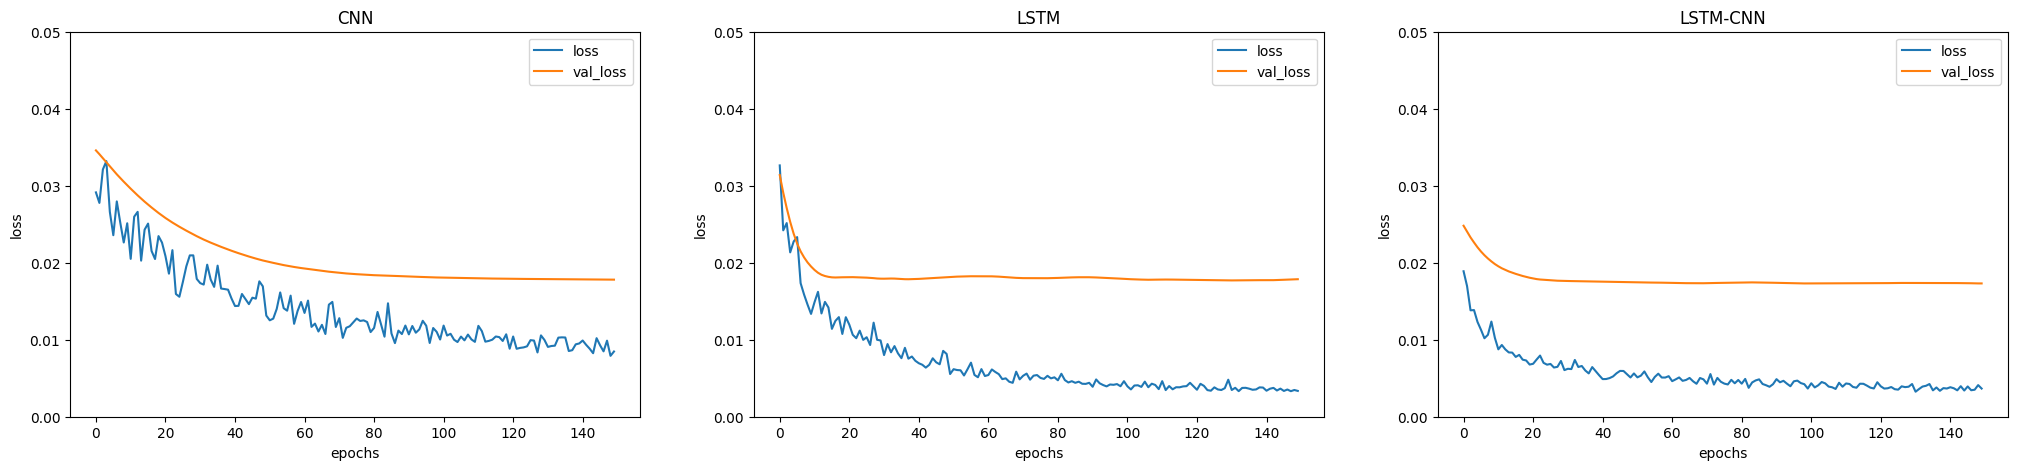

In [10]:
legend = list()

fig, axs = plt.subplots(1, 3, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])
    
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    
    plot_graphs('loss', val, ax, 0.05)
print("Loss Curves")

MAE Curves


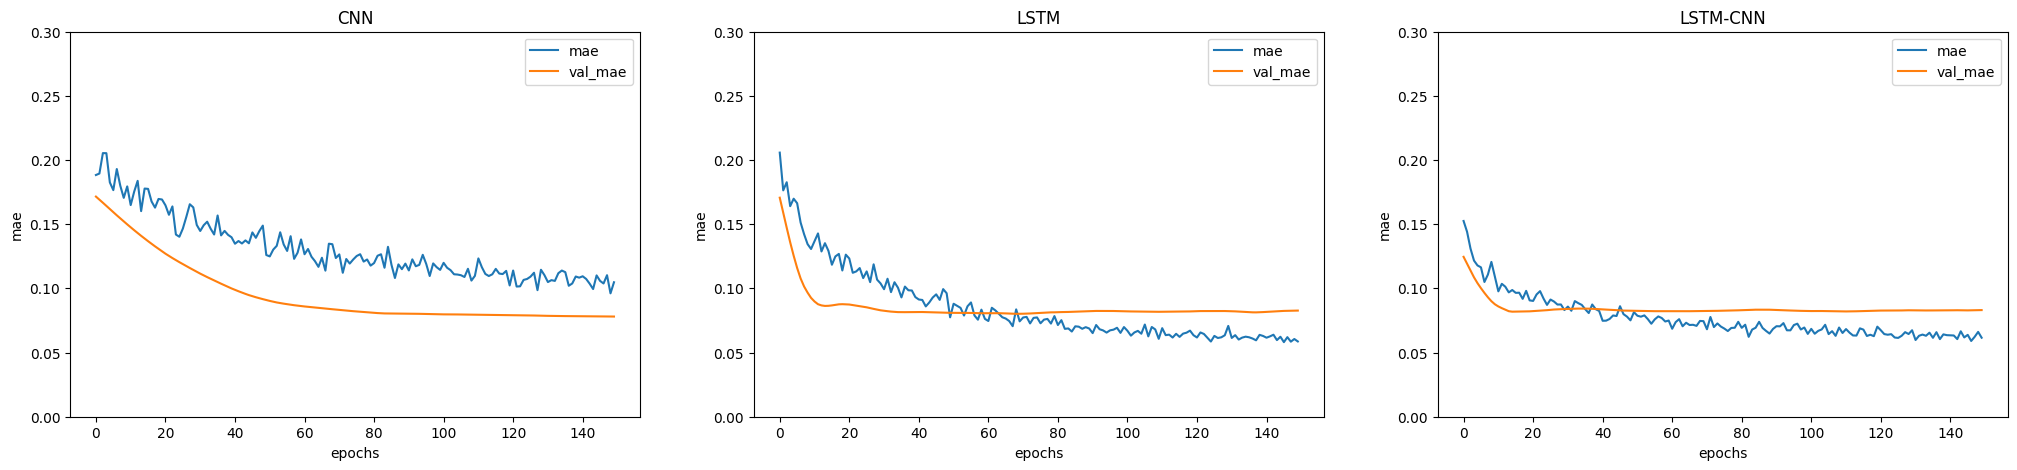

In [11]:
print("MAE Curves")
fig, axs = plt.subplots(1, 3, figsize=(25,5))
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('mae', val, ax, 0.3)

# Evaluation of Test Results
It's surprising to see how well a CNN did. LSTM would be expected to perform well because of its ability to learn and remember longer trends in the data.

Putting the models' performance in perspective however the results show how with a limited lookback window, and simple features a lstm, and a cnn stacked with an lstm are a good starting choice for architecture.


In [12]:
names = list()
performance = list()

for key, value in model_configs.items():
    names.append(key)
    mae = value['model'].evaluate(value['test_ds'])
    performance.append(mae[1])
    
performance_df = pd.DataFrame(performance, index=names, columns=['mae'])
performance_df

1/1 [==============================] - 0s 45ms/step - loss: 0.0025 - mae: 0.0615


,mae
CNN,0.053788
LSTM,0.057086
LSTM-CNN,0.061503


# Visualizing Predictions

Plot the actual and predicted 24 hour intervals. Below is the first 14 days of predictions. Interesting to note how the LSTM appears to oscilate over a longer frequency compared with the other models. The CNN also seems to capture the intra day oscillations (within the 24 hour period). Looking at the CNN stacked LSTM we can see how these two characteristics of the model's learning combine.

1/1 [==============================] - 0s 99ms/step


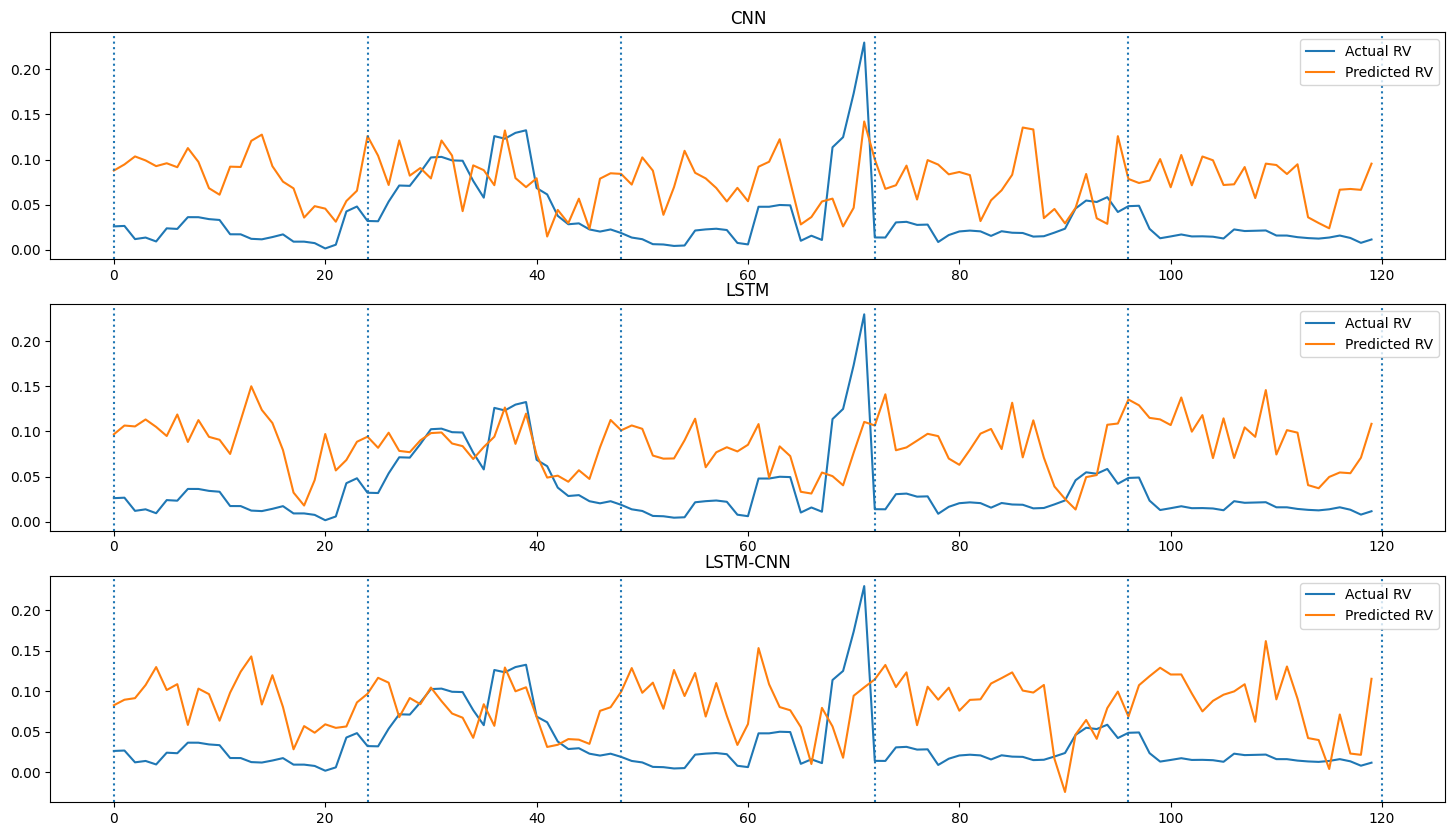

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(18, 10))
days = 5

vline = np.linspace(0, days*24, days+1)

for (key, val), ax in zip(model_configs.items(), axs):

    test = val['test_ds']
    preds = val['model'].predict(test)

    xbatch, ybatch = iter(test).get_next()

    ax.plot(ybatch.numpy()[:days].reshape(-1))
    ax.plot(preds[:days].reshape(-1))
    ax.set_title(key)
    ax.vlines(vline, ymin=0, ymax=1, linestyle='dotted', transform = ax.get_xaxis_transform())
    ax.legend(["Actual RV", "Predicted RV"])